<a href="https://colab.research.google.com/github/KristynaPijackova/Tutorials_NNs_and_signals/blob/main/Deep_Layers_22_DL_Architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16

Import data

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

Define the labels of the dataset

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

Plot the data

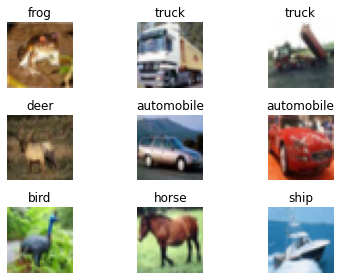

In [ ]:
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(x_train[i])
    plt.title(labels[int(y_train[i])])
    plt.axis('off')
plt.tight_layout()

Data preprocessing

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
input_shape = (32, 32, 3)
num_classes = len(labels)

In [ ]:
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_6 (Dropout)         (None, 2304)             

In [ ]:
batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Epoch 1/3
313/313 [==============================] - 4s 13ms/step - loss: 1.7283 - accuracy: 0.3750 - val_loss: 1.4529 - val_accuracy: 0.4889
Epoch 2/3
313/313 [==============================] - 4s 12ms/step - loss: 1.4139 - accuracy: 0.4965 - val_loss: 1.2934 - val_accuracy: 0.5539
Epoch 3/3
313/313 [==============================] - 4s 12ms/step - loss: 1.3133 - accuracy: 0.5365 - val_loss: 1.2298 - val_accuracy: 0.5729


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 1.2223429679870605
Test accuracy: 0.5723999738693237


In [ ]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_12 (3, 3, 3, 128)
conv2d_13 (3, 3, 128, 64)


In [ ]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

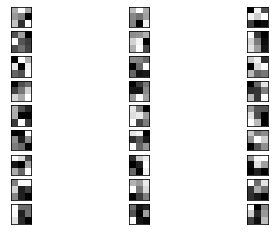

In [ ]:
# plot first few filters
n_filters, ix = 9, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [ ]:
img = x_test[0]
img = np.expand_dims(img, 0)

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
Total params: 3,584
Trainable params: 3,584
Non-trainable params: 0
_________________________________________________________________


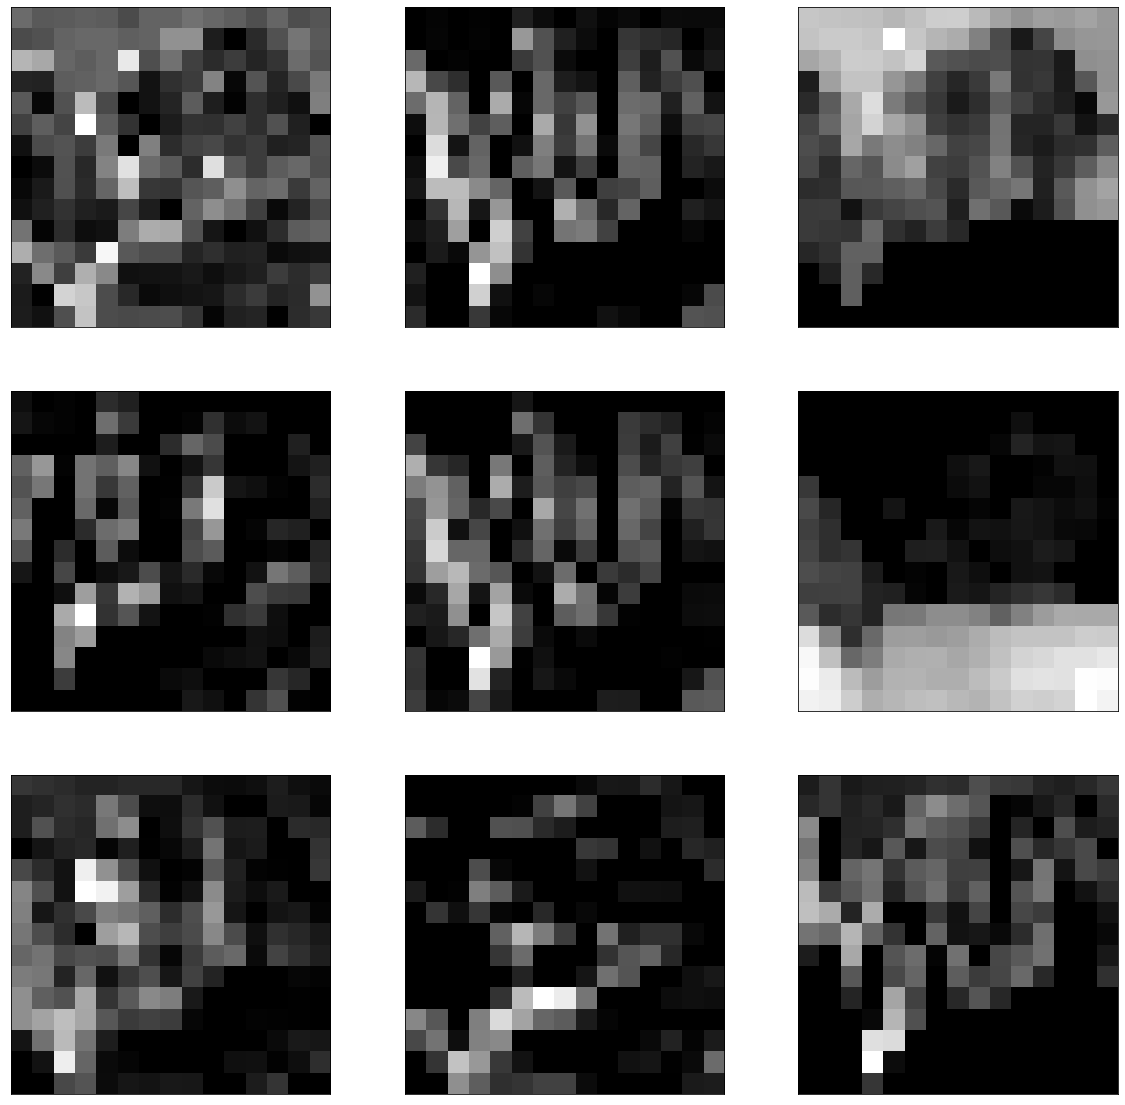

In [ ]:
output = keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
output.summary()
# load the image with the required shape

feature_maps = output.predict(img)
# plot all 64 maps in an 8x8 squares
square = 3
ix = 1
plt.figure(figsize=(20, 20)) 
for _ in range(square):
    for _ in range(square):

		# specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1

# show the figu

In [ ]:
# load the model
model = VGG16()
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [ ]:

# redefine model to output right after the first hidden layer
model = keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)

In [ ]:
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))

NameError: ignored